# Seatwork 4 - Diagonalization and Eigendecomposition

---

This seatwork should be submitted **by LT** on ALICE. Each question is worth 1 point. (10pts)
- Save your submitted notebook with the name: ***MDS_SW4_LTx.ipynb***, for example if you're LT8, ***MDS_SW4_LT8.ipynb***. 

LT Number: 2

Names:<br>
Balagon, Val Anthony<br>
Borromeo, Chloe<br>
Dorado, Joshua Renzo<br>
Tallo, Francis

## Eigenvalue Application: Markov Chains

---

A <b><i>Markov Chain</i></b> is a system that has $n$ possible states and passes through a series of transitions from one state to another.

Consider the following <b><i>stock market state model</i></b>:

<img src = "stockmarket.png" width = "300"/>

The probability of a transition from state $i$ to state $j$ is given by $a_{ij}$ where

\begin{align}
    0 \leq a_{ij} \leq 1
\end{align}

\begin{align}
    \sum_{i = 1}^{n} a_{ij} = 1
\end{align}

The model is typically represented as a <b><i>probability transition matrix</i></b>, given by

\begin{align}
    A = \begin{bmatrix}
        0.975 & 0.3 & 0.02\\
        0.02 & 0.5 & 0.40\\
        0.005 & 0.2 & 0.58
    \end{bmatrix}
\end{align}

Each column contains the probabilities of moving to state $i$ given that you are in state $j$, such that

- State $1$ corresponds to the Bull Market state


- State $2$ corresponds to the Bear Market state


- State $3$ corresponds to the Stagnant Market state

**Important Note:** In this notation, the convention is that each column sums to 1. In other works, the transitions may be flipped in which case the rows sum to 1.

Given $A$, let $x_i^{(k)}$ denote the probability that the system is in state $i$ after transition $k$:

\begin{align}
    x^{(k)} = \begin{bmatrix}
                x_1^{(k)}\\
                x_2^{(k)}\\
                x_3^{(k)}
            \end{bmatrix}
\end{align}

If the initial <b><i>probability distribution vector</i></b> is $x^{(0)}$, then the probability distribution vector after $k$ steps is

\begin{align}
    x^{(k)} = Ax^{(k-1)} = A^kx^{(0)}
\end{align}

The long-term behavior of the system is therefore determined by the value of

\begin{align}
    \lim_{k \rightarrow \infty} A^k
\end{align}

<div class="alert alert-block alert-info">

### Q1.

Suppose that the stock market is initially in a Bull Market.

\begin{align}
    x^{(0)} = \begin{bmatrix}
                1\\
                0\\
                0\\
            \end{bmatrix}
\end{align}

What is the probability distribution vector after three steps?

</div>

In [1]:
import numpy as np

A = np.array([[0.975, 0.3, 0.02],
             [0.02, 0.5, 0.4],
             [0.005, 0.2, 0.58]])
x_0 = np.array([1, 0, 0])

k = 3
x = np.linalg.matrix_power(A, k) @ x_0
# x = A @ A @ A @ x_0
print(f'Probability distribution vector after {k} steps.')
print(x.reshape(-1, 1))

Probability distribution vector after 3 steps.
[[0.94249237]
 [0.0395945 ]
 [0.01791313]]


<div class="alert alert-block alert-info">

### Q2.

What is the "long-term value" of the probability distribution vector, $\lim_{k \rightarrow \infty} x^{(k)}$?

What does the $\lim_{k \rightarrow \infty} x^{(k)}$ represent? How would you interpret it?

</div>

k = 000 -- x = [0. 0. 1.]
k = 010 -- x = [0.7539885 0.1415059 0.1045056]
k = 020 -- x = [0.87020596 0.07875996 0.05103408]
k = 030 -- x = [0.8832946  0.07169332 0.04501207]
k = 040 -- x = [0.88476867 0.07089747 0.04433386]
k = 050 -- x = [0.88493468 0.07080784 0.04425748]
k = 060 -- x = [0.88495338 0.07079774 0.04424888]
k = 070 -- x = [0.88495548 0.0707966  0.04424791]
k = 080 -- x = [0.88495572 0.07079648 0.0442478 ]
k = 090 -- x = [0.88495575 0.07079646 0.04424779]
k = 100 -- x = [0.88495575 0.07079646 0.04424779]


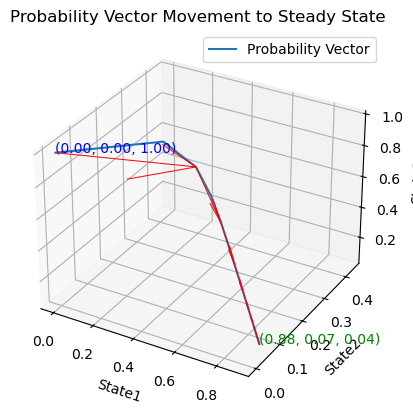

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

eps = 1e-10

xv = []
for k in range(0, 200):
    x = np.linalg.matrix_power(A, k) @ x_0
    xv.append(x)
    if k > 0 and np.all(np.abs(x - xv[k-1]) < eps):
        print(f'k = {k:03d} -- x = {x}')
        break
    if k % 10 == 0:
        print(f'k = {k:03d} -- x = {x}')

kv = np.linspace(0, k+1, k+1)
# print(kv.shape)
xv = np.array(xv)
# print(xv.shape)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot(xv[:, 0], xv[:, 1], xv[:, 2], label='Probability Vector')

# Add arrows indicating movement direction
# Choose points at intervals to place arrows
interval = 2
for i in range(0, len(kv) - interval, interval):
    ax.quiver(xv[i, 0], xv[i, 1], xv[i, 2],
              xv[i + interval, 0] - xv[i, 0],
              xv[i + interval, 1] - xv[i, 1],
              xv[i + interval, 2] - xv[i, 2],
              color='r',
              arrow_length_ratio=0.4,  # Increase arrow head size
              linewidth=0.7)
# Annotate the first point
ax.text(xv[0, 0], xv[0, 1], xv[0, 2], f'({xv[0, 0]:.2f}, {xv[0, 1]:.2f},'
        f'{xv[0, 2]: .2f})', color='blue')
# Annotate the last point
ax.text(xv[-1, 0], xv[-1, 1], xv[-1, 2], f'({xv[-1, 0]:.2f}, {xv[-1, 1]:.2f},'
        f'{xv[-1, 2]: .2f})', color='green')

ax.set_xlabel('State1')
ax.set_ylabel('State2')
ax.set_zlabel('State3')
ax.set_title('Probability Vector Movement to Steady State')
ax.legend()
plt.show()


<div class="alert alert-block alert-success">

The limit indicates the steady-state condition wherein the probability of each state converges to a single value.<br>
Thus, the transitions between states now lead to to the same probability distribution vector.

</div>

<div class="alert alert-block alert-info">

### Q3.

Does the long-term value of the probability distribution vector depend on the particular starting value $x^{(0)}$?

</div>

k = 000 -- x = [0. 0. 1.]
k = 010 -- x = [0.7539885 0.1415059 0.1045056]
k = 020 -- x = [0.87020596 0.07875996 0.05103408]
k = 030 -- x = [0.8832946  0.07169332 0.04501207]
k = 040 -- x = [0.88476867 0.07089747 0.04433386]
k = 050 -- x = [0.88493468 0.07080784 0.04425748]
k = 060 -- x = [0.88495338 0.07079774 0.04424888]
k = 070 -- x = [0.88495548 0.0707966  0.04424791]
k = 080 -- x = [0.88495572 0.07079648 0.0442478 ]
k = 090 -- x = [0.88495575 0.07079646 0.04424779]
k = 100 -- x = [0.88495575 0.07079646 0.04424779]


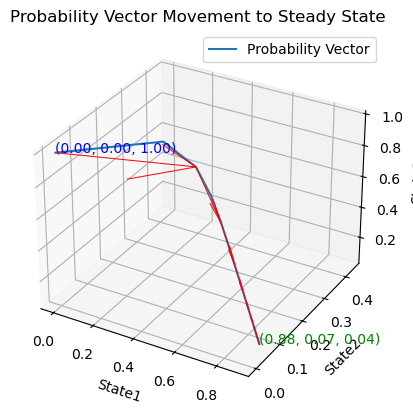

In [4]:
eps = 1e-10
x_0 = np.array([0, 0, 1])

xv = []
for k in range(0, 200):
    x = np.linalg.matrix_power(A, k) @ x_0
    xv.append(x)
    if k > 0 and np.all(np.abs(x - xv[k-1]) < eps):
        print(f'k = {k:03d} -- x = {x}')
        break
    if k % 10 == 0:
        print(f'k = {k:03d} -- x = {x}')

kv = np.linspace(0, k+1, k+1)
# print(kv.shape)
xv = np.array(xv)
# print(xv.shape)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot(xv[:, 0], xv[:, 1], xv[:, 2], label='Probability Vector')

# Add arrows indicating movement direction
# Choose points at intervals to place arrows
interval = 2
for i in range(0, len(kv) - interval, interval):
    ax.quiver(xv[i, 0], xv[i, 1], xv[i, 2],
              xv[i + interval, 0] - xv[i, 0],
              xv[i + interval, 1] - xv[i, 1],
              xv[i + interval, 2] - xv[i, 2],
              color='r',
              arrow_length_ratio=0.4,  # Increase arrow head size
              linewidth=0.7)
# Annotate the first point
ax.text(xv[0, 0], xv[0, 1], xv[0, 2], f'({xv[0, 0]:.2f}, {xv[0, 1]:.2f},'
        f'{xv[0, 2]: .2f})', color='blue')
# Annotate the last point
ax.text(xv[-1, 0], xv[-1, 1], xv[-1, 2], f'({xv[-1, 0]:.2f}, {xv[-1, 1]:.2f},'
        f'{xv[-1, 2]: .2f})', color='green')

ax.set_xlabel('State1')
ax.set_ylabel('State2')
ax.set_zlabel('State3')
ax.set_title('Probability Vector Movement to Steady State')
ax.legend()
plt.show()


<div class="alert alert-block alert-success">

It doesn't matter what the initial value is, the steady-state probability distribution remains the same provided that the Markov chain is irreducible and aperiodic<br>
(i.e. there is only one steady-state probability distribution).

</div>


<div class="alert alert-block alert-info">

### Q4.

What is the value of $\lim_{k \rightarrow \infty} A^k$?

</div>

In [5]:
eps = 1e-10


A_kv = []
for k in range(0, 1000):
    A_k = np.linalg.matrix_power(A, k)
    A_kv.append(A_k)
    # if k > 0 and abs(np.linalg.det(A_k) - np.linalg.det(A_kv[k-1])) < eps:
    if k > 0 and np.all(np.abs(A_k - A_kv[k-1]) < eps):
        print(f'k = {k:03d} -- det(A_k) = {np.linalg.det(A_k)}')
        break
    if k % 10 == 0:
        print(f'k = {k:03d} -- det(A_k) = {np.linalg.det(A_k)}')
        
print('\nLimit of A^k as k approaches infinity:')
print(A_k)

k = 000 -- det(A_k) = 1.0
k = 010 -- det(A_k) = 1.1255458458757874e-07
k = 020 -- det(A_k) = 1.2668512754609831e-14
k = 030 -- det(A_k) = -8.34008234477247e-21
k = 040 -- det(A_k) = 0.0
k = 050 -- det(A_k) = 1.0578280448197981e-22
k = 060 -- det(A_k) = -2.3826894475907427e-23
k = 070 -- det(A_k) = 6.708567891353895e-25
k = 080 -- det(A_k) = 2.2665924762158627e-25
k = 090 -- det(A_k) = -8.508922286667037e-27
k = 100 -- det(A_k) = 1.9165798102403104e-27

Limit of A^k as k approaches infinity:
[[0.88495575 0.88495575 0.88495575]
 [0.07079646 0.07079646 0.07079646]
 [0.04424779 0.04424779 0.04424779]]



<div class="alert alert-block alert-info">

### Q5.

Compute the eigenvalues and eigenvectors of $A$.

</div>

In [265]:
A = np.array([[0.975, 0.3, 0.02],
             [0.02, 0.5, 0.4],
             [0.005, 0.2, 0.58]])
x_0 = np.array([1, 0, 0])

w, P = np.linalg.eig(A)

print('Eigenvalues:')
print(w.reshape(-1, 1))
print('Eigenvectors')
print(P)

Eigenvalues:
[[1.        ]
 [0.80382635]
 [0.25117365]]
Eigenvectors
[[ 0.99557949  0.81563112  0.32258572]
 [ 0.07964636 -0.44036406 -0.8108726 ]
 [ 0.04977897 -0.37526706  0.48828688]]


<div class="alert alert-block alert-info">

### Q6.

What is the relationship between $\lim_{k \rightarrow \infty} A^k$ and the eigenvalues and eigenvectors of $A$?

</div>

In [266]:
D = np.diag(w)
P_inv = np.linalg.inv(P)

print('P @ D @ P_inv')
print(P @ D @ P_inv)
D_pok = np.round(np.linalg.matrix_power(D, 100), 0)
print('\nD^k; k approaching +infinity.')
print(D_pok)
print('\nP @ D^k @ P_inv; k approaching +infinity')
print(P @ D_pok @ P_inv)

P @ D @ P_inv
[[0.975 0.3   0.02 ]
 [0.02  0.5   0.4  ]
 [0.005 0.2   0.58 ]]

D^k; k approaching +infinity.
[[1. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]

P @ D^k @ P_inv; k approaching +infinity
[[0.88495575 0.88495575 0.88495575]
 [0.07079646 0.07079646 0.07079646]
 [0.04424779 0.04424779 0.04424779]]


<div class="alert alert-block alert-success">

The limit of $A^k$ is the same as $P @ D^k @ P^{-1}$ as $k$ approaches infinity; where $P$ is composed of the eigenvectors (per col) and $D$ is a diagonal of eigenvalues.<br> 
The limit of $A^n$ as $n$ approaches infinity $lim_{n \to \infty} A^n$ depends on the eigenvalues of $A$.<br>
If all eigenvalues are $<1$ in absolute value, $lim_{n \to \infty} A^n$ will be a zero matrix because each term in the diagonalized form $D^n$ will approach zero.<br>
If any eigenvalue has an absolute value $>1$, $lim_{n \to \infty} A^n$ does not exist since one term in $D^n$ approaches infinity.<br>
If an eigenvalue equals one or negative one, $lim_{n \to \infty} A^n$$ will have terms that approach a non-zero limit or oscillatory behavior.

</div>

<div class="alert alert-block alert-info">

### Q7.

Consider the eigenvalues of $A$.

Must 1 always be an eigenvalue of the <u>transition matrix of a Markov chain</u>? Should it also be the largest in absolute value?

What happens if these were not the case?

</div>

In [267]:
# array with column sum = 2
A = np.array([[1.975, 0.3, 0.02],
             [0.02, 1.5, 0.4],
             [0.005, 0.2, 1.58]])
w, P = np.linalg.eig(A)
print('Vector with column sum = 2:')
print(A)
print('Eigenvalues:')
print(w.reshape(-1, 1))
print('Eigenvectors:')
print(P)
print('Now, we have eigenvalue = 2. This will cause A to blow up')

print()
A_kv = []
for k in range(0, 100):
    A_k = np.linalg.matrix_power(A, k)
    A_kv.append(A_k)
    # if k > 0 and abs(np.linalg.det(A_k) - np.linalg.det(A_kv[k-1])) < eps:
    if k >  0 and np.all(np.abs(A_k - A_kv[k-1]) < eps):  # will not be satisfied
        print(f'k = {k:03d} -- det(A_k) = {np.linalg.det(A_k)}')
        break
    if k % 10 == 0:
        print(f'k = {k:03d} -- det(A_k) = {np.linalg.det(A_k)}')
        
print('\nA^k has no limit as k approaches infinity. In fact, the values are blowing up.')
print(A_k)

Vector with column sum = 2:
[[1.975 0.3   0.02 ]
 [0.02  1.5   0.4  ]
 [0.005 0.2   1.58 ]]
Eigenvalues:
[[2.        ]
 [1.80382635]
 [1.25117365]]
Eigenvectors:
[[ 0.99557949  0.81563112  0.32258572]
 [ 0.07964636 -0.44036406 -0.8108726 ]
 [ 0.04977897 -0.37526706  0.48828688]]
Now, we have eigenvalue = 2. This will cause A to blow up

k = 000 -- det(A_k) = 1.0
k = 010 -- det(A_k) = 3510937.6907318695
k = 020 -- det(A_k) = 12326683468201.678
k = 030 -- det(A_k) = 4.327821759000831e+19
k = 040 -- det(A_k) = 1.5194712536308904e+26
k = 050 -- det(A_k) = 5.334769303769559e+32
k = 060 -- det(A_k) = 1.8729956030769893e+39
k = 070 -- det(A_k) = 6.575878321196482e+45
k = 080 -- det(A_k) = 2.1368331098513838e+52
k = 090 -- det(A_k) = -5.107375571967763e+59

A^k has no limit as k approaches infinity. In fact, the values are blowing up.
[[5.60909899e+29 5.60892198e+29 5.60880503e+29]
 [4.48712087e+28 4.48807660e+28 4.48870799e+28]
 [2.80441922e+28 2.80523366e+28 2.80577172e+28]]


<div class="alert alert-block alert-success">

One (1) must always be an eigenvalue of the transition matrix of a Markov chain.<br>
The columns of a transition matrix sum to 1, which ensures that the vector of 1's is an eigenvector (w/ corresponding eigenvalue = 1).<br>

For a Markov chain, the eigenvalue = 1 is always the largest in absolute value.<br>
From the Perron-Frobenius theorem, a real square matrix with non-negative values has a unique largest real eigenvalue (in absolute value),<br>
and the corresponding eigenvector are chosen to have strictly positive values.<br>
    
If this was not the case, it would not represent a valid transition matrix for a Markov chain.<br>
Eigenvalue = 1 ensures that the sum of probabilities = 1, preserving the total probability.<br>
If the largest eigenvalue were greater than 1, probabilities would keep on increasing (not meaningful for a Markov process).
    
</div>

<div class="alert alert-block alert-info">

### Q8.

A probability distribution vector $x$ is said to be <b><i>stationary</i></b> if $Ax = x$. 

How can you determine such a stationary value $x$ using the eigenvalues and eigenvectors of $A$?

<i>Hints</i>:

1) Recall the formal definition of an eigenvalue-eigenvector pair. Can you see its relation to the question being asked?

2) Try solving <b>Q5</b> by hand.

3) Try to understand what `numpy.linalg.eig` does to your eigenvectors.

</div>

In [10]:
A = np.array([[0.975, 0.3, 0.02],
             [0.02, 0.5, 0.4],
             [0.005, 0.2, 0.58]])
w, P = np.linalg.eig(A)
# find eigenvalue iindex close to 1
idx = np.where(np.isclose(w, 1))
# retieve the column corresponding to eigenvalue = 1
stv = P[:, idx]
print('The stationary vector:')
print(stv.reshape(-1, 1))
print('No matter the transitions, result is now stationary.')
print(A @ stv.reshape(-1, 1))

The stationary vector:
[[0.99557949]
 [0.07964636]
 [0.04977897]]
No matter the transitions, result is now stationary.
[[0.99557949]
 [0.07964636]
 [0.04977897]]


<div class="alert alert-block alert-success">

From the equation, we find that the eigenvalue is equal to 1.<br>
This is consistent with a probability distribution vector x that remains unchanged after applying matrix A (Ax = x).<br>
Where eigenvalue = 1, we find the corresponding eigenvector from np.linalg.eig which gives us our stationary value x.

</div>

<div class="alert alert-block alert-info">

### Q9.

How can you compute a stationary value $x$ <i>without</i> having to calculate the eigenvalues and eigenvectors of $A$?

</div>

Random initial value: [0.37270815 0.1783692  0.44892265]
k = 000 -- x = [0.37270815 0.1783692  0.44892265]
k = 010 -- x = [0.81762296 0.10714966 0.07522738]
k = 020 -- x = [0.8773726  0.07489065 0.04773675]
k = 030 -- x = [0.88410172 0.07125755 0.04464072]
k = 040 -- x = [0.88485957 0.07084839 0.04429204]
k = 050 -- x = [0.88494492 0.07080231 0.04425277]
k = 060 -- x = [0.88495453 0.07079712 0.04424835]
k = 070 -- x = [0.88495561 0.07079653 0.04424785]
k = 080 -- x = [0.88495574 0.07079647 0.04424779]
k = 090 -- x = [0.88495575 0.07079646 0.04424779]
k = 097 -- x = [0.88495575 0.07079646 0.04424779]


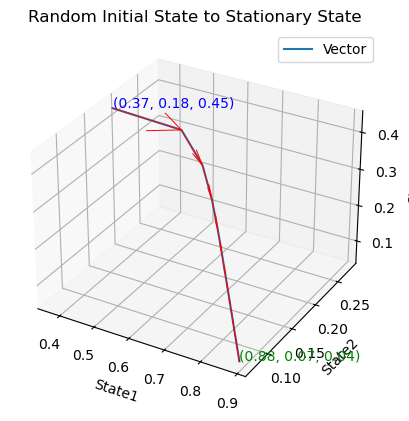

In [13]:
A = np.array([[0.975, 0.3, 0.02],
             [0.02, 0.5, 0.4],
             [0.005, 0.2, 0.58]])
x_0 = np.random.uniform(0, 1, 3)
x_0 = x_0 / np.sum(x_0)
print('Random initial value:', x_0)

eps = 1e-10

xv = []
for k in range(0, 200):
    x = np.linalg.matrix_power(A, k) @ x_0
    xv.append(x)
    if k > 0 and np.all(np.abs(x - xv[k-1]) < eps):
        print(f'k = {k:03d} -- x = {x}')
        break
    if k % 10 == 0:
        print(f'k = {k:03d} -- x = {x}')

kv = np.linspace(0, k+1, k+1)
# print(kv.shape)
xv = np.array(xv)
# print(xv.shape)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot(xv[:, 0], xv[:, 1], xv[:, 2], label='Vector')

# Add arrows indicating movement direction
# Choose points at intervals to place arrows
interval = 1
for i in range(0, len(kv) - interval, interval):
    ax.quiver(xv[i, 0], xv[i, 1], xv[i, 2],
              xv[i + interval, 0] - xv[i, 0],
              xv[i + interval, 1] - xv[i, 1],
              xv[i + interval, 2] - xv[i, 2],
              color='r',
              arrow_length_ratio=0.4,  # Increase arrow head size
              linewidth=0.7)
# Annotate the first point
ax.text(xv[0, 0], xv[0, 1], xv[0, 2], f'({xv[0, 0]:.2f}, {xv[0, 1]:.2f},'
        f'{xv[0, 2]: .2f})', color='blue')
# Annotate the last point
ax.text(xv[-1, 0], xv[-1, 1], xv[-1, 2], f'({xv[-1, 0]:.2f}, {xv[-1, 1]:.2f},'
        f'{xv[-1, 2]: .2f})', color='green')

ax.set_xlabel('State1')
ax.set_ylabel('State2')
ax.set_zlabel('State3')
ax.set_title('Random Initial State to Stationary State')
ax.legend()
plt.show()

<div class="alert alert-block alert-success">

Repeatedly applying A to x converges to the stationary state w/o calculating eigenvalues/eigenvectors.<br>
Every transformation of x by A stretches x in the direction of the dominant eigenvector (the one associated with the largest absolute eigenvalue).<br>
And in this case, this eigenvalue is equal to 1.<br>
We normalize the initial random x (max value = 1) to ensure that the final stationary state is also normalized and consistent.
</div>

<div class="alert alert-block alert-info">

### Q10.

Can there be more than one stationary distribution vector for a given Markov chain? 

If not, why? If so, give an example.

</div>

<div class="alert alert-block alert-success">

A Markov chain is irreducible if it is possible to get to any state from any state.<br>
Also, it is aperiodic if the greatest common divisor of the lengths of its cycles is one.<br> If it has both properties, then there is exactly one stationary distribution.<br>
If not, then it can have more than one.

</div>

Random initial value: [0.3940108 0.6059892 1.       ]
k = 000 -- x = [0.3940108 0.6059892 1.       ]
k = 010 -- x = [0.44444444 0.55555556 1.        ]


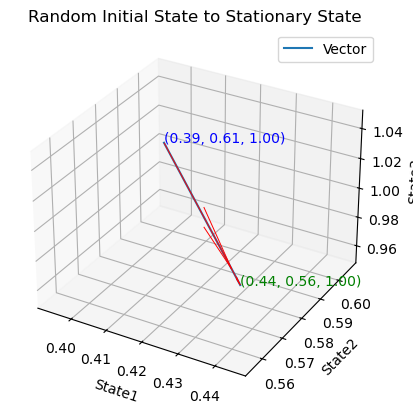

Two stationary states:
[0.44444444 0.55555556]
[1.0]


In [51]:
A = np.array([[0.5, 0.4, 0],
              [0.5, 0.6, 0],
              [0, 0, 1]])

x_0 = np.random.uniform(0, 1, 2)
x_0 = x_0 / np.sum(x_0)
x_0 = np.append(x_0, 1)
print('Random initial value:', x_0)

eps = 1e-10

xv = []
for k in range(0, 200):
    x = np.linalg.matrix_power(A, k) @ x_0
    xv.append(x)
    if k > 0 and np.all(np.abs(x - xv[k-1]) < eps):
        print(f'k = {k:03d} -- x = {x}')
        break
    if k % 10 == 0:
        print(f'k = {k:03d} -- x = {x}')

kv = np.linspace(0, k+1, k+1)
# print(kv.shape)
xv = np.array(xv)
# print(xv.shape)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot(xv[:, 0], xv[:, 1], xv[:, 2], label='Vector')

# Add arrows indicating movement direction
# Choose points at intervals to place arrows
interval = 1
for i in range(0, len(kv) - interval, interval):
    ax.quiver(xv[i, 0], xv[i, 1], xv[i, 2],
              xv[i + interval, 0] - xv[i, 0],
              xv[i + interval, 1] - xv[i, 1],
              xv[i + interval, 2] - xv[i, 2],
              color='r',
              arrow_length_ratio=0.4,  # Increase arrow head size
              linewidth=0.7)
# Annotate the first point
ax.text(xv[0, 0], xv[0, 1], xv[0, 2], f'({xv[0, 0]:.2f}, {xv[0, 1]:.2f},'
        f'{xv[0, 2]: .2f})', color='blue')
# Annotate the last point
ax.text(xv[-1, 0], xv[-1, 1], xv[-1, 2], f'({xv[-1, 0]:.2f}, {xv[-1, 1]:.2f},'
        f'{xv[-1, 2]: .2f})', color='green')

ax.set_xlabel('State1')
ax.set_ylabel('State2')
ax.set_zlabel('State3')
ax.set_title('Random Initial State to Stationary State')
ax.legend()
plt.show()

print('Two stationary states:')
print(x[:-1])
print([x[-1]])

In [42]:
A = np.array([[0.5, 0.4, 0, 0],
              [0.5, 0.6, 0, 0],
              [0, 0, 0.9, 0.4],
              [0, 0, 0.1, 0.6]])
x_0 = np.array([1, 0, 0, 1])
# x_0 = np.random.uniform(0, 1, 4)
# x_0 = x_0 / np.sum(x_0)
# x_0 = np.append(x_0, 1)
print('Random initial value:', x_0)

eps = 1e-10

xv = []
for k in range(0, 200):
    x = np.linalg.matrix_power(A, k) @ x_0
    xv.append(x)
    if k > 0 and np.all(np.abs(x - xv[k-1]) < eps):
        print(f'k = {k:03d} -- x = {x}')
        break
    if k % 10 == 0:
        print(f'k = {k:03d} -- x = {x}')

kv = np.linspace(0, k+1, k+1)
# print(kv.shape)
xv = np.array(xv)
# print(xv.shape)

# Create a 3D plot
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

# ax.plot(xv[:, 0], xv[:, 1], xv[:, 2], label='Vector')

# # Add arrows indicating movement direction
# # Choose points at intervals to place arrows
# interval = 1
# for i in range(0, len(kv) - interval, interval):
#     ax.quiver(xv[i, 0], xv[i, 1], xv[i, 2],
#               xv[i + interval, 0] - xv[i, 0],
#               xv[i + interval, 1] - xv[i, 1],
#               xv[i + interval, 2] - xv[i, 2],
#               color='r',
#               arrow_length_ratio=0.4,  # Increase arrow head size
#               linewidth=0.7)
# # Annotate the first point
# ax.text(xv[0, 0], xv[0, 1], xv[0, 2], f'({xv[0, 0]:.2f}, {xv[0, 1]:.2f},'
#         f'{xv[0, 2]: .2f})', color='blue')
# # Annotate the last point
# ax.text(xv[-1, 0], xv[-1, 1], xv[-1, 2], f'({xv[-1, 0]:.2f}, {xv[-1, 1]:.2f},'
#         f'{xv[-1, 2]: .2f})', color='green')

# ax.set_xlabel('State1')
# ax.set_ylabel('State2')
# ax.set_zlabel('State3')
# ax.set_title('Random Initial State to Stationary State')
# ax.legend()
# plt.show()

# print('Two stationary states:')
# print(x[:-1])
# print([x[-1]])
print('Two stationary states:')
print(x[:-2])
print([x[2:]])

Random initial value: [1 0 0 1]
k = 000 -- x = [1. 0. 0. 1.]
k = 010 -- x = [0.44444444 0.55555556 0.79921875 0.20078125]
k = 020 -- x = [0.44444444 0.55555556 0.79999924 0.20000076]
k = 030 -- x = [0.44444444 0.55555556 0.8        0.2       ]
k = 033 -- x = [0.44444444 0.55555556 0.8        0.2       ]
Two stationary states:
[0.44444444 0.55555556]
[array([0.8, 0.2])]
